# Import Libraries, assign path, import data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

In [2]:
path = r'C:\Users\Johnn\Documents\Instacart Basket Analysis'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

The data contains first and last names of customers, which is PII data. Since we shouldn't use these in our analysis, a copy of the data set will be made and used.

In [5]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# Drop PII data

In [6]:
ords_prods_cust_merged_2 = df.drop(columns = ['first_name', 'last_name'])

In [7]:
ords_prods_cust_merged_2.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


# Create region column to divide data

In [8]:
ords_prods_cust_merged_2['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [9]:
result = []

for value in ords_prods_cust_merged_2['state']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value =='New Jersey'):
        result.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        result.append('Midwest')
    elif (value == 'Deleware') or (value == 'Maryland') or (value == 'District of Columbia') or (value == 'Virginia') or (value == 'West Virginia') or (value == 'North Carolina') or (value == 'South Carolina') or (value == 'Georgia') or (value == 'Florida') or (value == 'Kentucky') or (value == 'Tennessee') or (value == 'Mississippi') or (value == 'Alabama') or (value == 'Oklahoma') or (value == 'Texas') or (value == 'Arkansas') or (value == 'Louisiana'):
        result.append('South')
    else:
        result.append('West')

In [10]:
ords_prods_cust_merged_2['region'] = result

In [11]:
ords_prods_cust_merged_2['region'].value_counts(dropna = False)

South        10154861
West          8929937
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

# Differences in spending habits between regions

In [12]:
crosstab = pd.crosstab(ords_prods_cust_merged_2['region'],ords_prods_cust_merged_2['spending_flag'],dropna = False)

In [13]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,193091,9961770
West,176954,8752983


In [16]:
midwest = (155975/7597325)*100

In [17]:
midwest

2.053025242437305

In [18]:
northeast = (108225/5722736)*100

In [19]:
northeast

1.8911408808653762

In [20]:
south = (193091/10154861)*100

In [21]:
south

1.9014637423397522

In [22]:
west = (176954/8929937)*100

In [23]:
west

1.9815817289640454

The difference in spending habits between regions is not very significant. The south has the highest number of high spenders, but not a substantial lead.

# Excluding low-activity customers

In [25]:
ords_prods_cust_merged_2.loc[ords_prods_cust_merged_2['max_order'] < 5, 'exclusion_flag'] = 'low activity customer'

In [26]:
ords_prods_cust_merged_2.loc[ords_prods_cust_merged_2['max_order'] >= 5, 'exclusion_flag'] = 'high activity customer'

In [27]:
ords_prods_cust_merged_2['exclusion_flag'].value_counts(dropna = False)

high activity customer    30964564
low activity customer      1440295
Name: exclusion_flag, dtype: int64

In [28]:
ords_prods_low_activity_cust = ords_prods_cust_merged_2[ords_prods_cust_merged_2['exclusion_flag']=='low activity customer']

In [29]:
ords_prods_low_activity_cust['max_order'].value_counts()

4    753543
3    686741
2         6
1         5
Name: max_order, dtype: int64

In [32]:
ords_prods_high_activity_cust = ords_prods_cust_merged_2[ords_prods_cust_merged_2['exclusion_flag']=='high activity customer']

In [33]:
ords_prods_high_activity_cust['max_order'].value_counts().sort_index()

5      793140
6      811396
7      803979
8      811843
9      810213
       ...   
95      59877
96      40453
97      44949
98      44587
99    1171333
Name: max_order, Length: 95, dtype: int64

In [34]:
ords_prods_low_activity_cust.to_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_low_activity_cust.pkl'))

In [35]:
ords_prods_high_activity_cust.to_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_high_activity_cust.pkl'))

# Customer Profiling

Profiles will be based on age, income, and dependents

In [37]:
age_group = []

for value in ords_prods_cust_merged_2['age']:
    if value <= 20:
        age_group.append('18-20')
    elif (value > 20) and (value <= 30):
        age_group.append('21-30')
    elif (value > 30) and (value <= 40):
        age_group.append('31-40')
    elif (value > 40) and (value <= 50):
        age_group.append('41-50')
    elif (value > 50) and (value <= 60):
        age_group.append('51-60')
    elif (value > 60) and (value <= 70):
        age_group.append('61-70')
    elif (value > 70) and (value <= 80):
        age_group.append('71-80')
    elif (value > 80) and (value <= 82):
        age_group.append('80+')    
    else:
        result.append('Not in age category')

In [38]:
ords_prods_cust_merged_2['age_group'] = age_group

In [39]:
ords_prods_cust_merged_2['age_group'].value_counts().sort_index()

18-20    1522928
21-30    5076431
31-40    5070687
41-50    5092179
51-60    5059795
61-70    5004669
71-80    5068886
80+       509284
Name: age_group, dtype: int64

# Income ranges

In [40]:
customer_income = ords_prods_cust_merged_2['income'].value_counts().sort_index()

In [41]:
income = []

for value in ords_prods_cust_merged_2['income']:
    if value <= 25000: 
        income.append('0-25000')
    elif (value > 25000) and (value <= 40000):
        income.append('25000-50000')
    elif (value > 40000) and (value <= 80000):
        income.append('50000-100000')
    elif (value > 80000) and (value <= 120000):
        income.append('100000-150000')
    elif (value > 120000) and (value <= 160000):
        income.append('150000-200000')
    elif (value > 160000) and (value <= 210000):
        income.append('200000-250000')
    elif (value > 250000):
        income.append('250000+')
    else: 
        income.append('other')

In [42]:
ords_prods_cust_merged_2['income_range'] = income

In [43]:
ords_prods_cust_merged_2['income_range'].value_counts().sort_index()

100000-150000    11259688
150000-200000     7362447
200000-250000     1965505
25000-50000       1727198
250000+            182580
50000-100000      9846873
other               60568
Name: income_range, dtype: int64

# Identify parents

In [44]:
ords_prods_cust_merged_2.loc[ords_prods_cust_merged_2['number_of_dependants'] == 0, 'parental_status'] = 'non parent'

In [45]:
ords_prods_cust_merged_2.loc[ords_prods_cust_merged_2['number_of_dependants'] >= 1, 'parental_status'] = 'parent'

In [46]:
ords_prods_cust_merged_2['parental_status'].value_counts(dropna = False)

parent        24307356
non parent     8097503
Name: parental_status, dtype: int64

# Adjust day of week

In [48]:
ords_prods_cust_merged_2['order_dow'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_dow, dtype: int64

In [49]:
orders_day_of_week = pd.crosstab(ords_prods_cust_merged_2['order_dow'],ords_prods_cust_merged_2['order_number'],dropna = False)

In [50]:
orders_day_of_week

order_number,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
order_dow,,,,,,,,,,,,,,,,,,,,,
0,425095,404851,410202,361811,319918,290938,265732,241639,219988,200247,...,2368,2435,2299,2137,2063,1590,1801,1735,1543,1533
1,356512,358602,355190,315785,279666,252007,230850,209307,193160,180103,...,3003,2772,2986,2744,2826,2785,2370,2486,2009,2127
2,266266,265935,267958,239297,212188,194319,172706,160788,143500,133300,...,2329,2724,2431,2067,2333,1971,2020,1914,1834,1800
3,239945,239247,239064,215604,192231,174208,157708,142230,131958,119516,...,2745,2171,2276,2354,2187,1889,2092,1711,1918,1693
4,229271,228357,230720,205629,188523,166061,153474,139533,130149,118832,...,2406,2450,2274,2389,2334,2204,1917,2064,2062,1810
5,253465,254061,255995,225073,202619,184414,165067,152539,143346,131498,...,2437,2511,2227,1998,1785,2424,1926,1987,2088,1981
6,305542,295356,289739,255410,231756,208947,187098,172011,157390,144282,...,1909,1782,1730,1706,1672,1653,1611,1459,1397,1477


In [52]:
ords_prods_cust_merged_2.loc[ords_prods_cust_merged_2['order_dow'] == 0, 'weekday'] = 'Saturday'

In [53]:
ords_prods_cust_merged_2.loc[ords_prods_cust_merged_2['order_dow'] == 1, 'weekday'] = 'Sunday'
ords_prods_cust_merged_2.loc[ords_prods_cust_merged_2['order_dow'] == 2, 'weekday'] = 'Monday'
ords_prods_cust_merged_2.loc[ords_prods_cust_merged_2['order_dow'] == 3, 'weekday'] = 'Tuesday'
ords_prods_cust_merged_2.loc[ords_prods_cust_merged_2['order_dow'] == 4, 'weekday'] = 'Wednesday'
ords_prods_cust_merged_2.loc[ords_prods_cust_merged_2['order_dow'] == 5, 'weekday'] = 'Thursday'
ords_prods_cust_merged_2.loc[ords_prods_cust_merged_2['order_dow'] == 6, 'weekday'] = 'Friday'

In [54]:
ords_prods_cust_merged_2['weekday'].value_counts().sort_index()

Friday       4496490
Monday       4213830
Saturday     6204182
Sunday       5660230
Thursday     4205791
Tuesday      3840534
Wednesday    3783802
Name: weekday, dtype: int64

# Adjust hour of day

In [55]:
ords_prods_cust_merged_2['order_hour_of_day'].value_counts().sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

# Hours will be seperated into Morning(Midnight-noon), Afternoon(noon-6pm), and Evening(6pm-midnight)

In [56]:
result = []

for value in ords_prods_cust_merged_2['order_hour_of_day']:
    if value <= 11: 
        result.append('Morning')
    elif (value > 11) and (value <= 18):
        result.append('Afternoon')
    elif (value > 19) and (value <= 24):
        result.append('Evening')
    else: 
        result.append('other')

In [57]:
result

['Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning'

In [58]:
ords_prods_cust_merged_2['part_of_day'] = result

In [59]:
ords_prods_cust_merged_2['part_of_day'].value_counts()

Afternoon    16890124
Morning      11448096
Evening       2808334
other         1258305
Name: part_of_day, dtype: int64

# Check martial status

In [62]:
ords_prods_cust_merged_2['marital_status'].value_counts()

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: marital_status, dtype: int64

# Get statistics for product_id

In [63]:
Sales_product_id = ords_prods_cust_merged_2.groupby('product_id').agg({'prices' : ['min', 'mean', 'max','sum']})

In [65]:
Sales_product_id.head()

prices                     
              min  mean   max      sum
product_id                            
1             5.8   5.8   5.8  10741.6
2             9.3   9.3   9.3    837.0
3             4.5   4.5   4.5   1246.5
4            10.5  10.5  10.5   3454.5
5             4.3   4.3   4.3     64.5

In [67]:
Sales_product_name = ords_prods_cust_merged_2.groupby('product_name').agg({'prices' : ['min', 'mean', 'max','sum']})

In [69]:
Sales_product_name

prices                    
                                                      min  mean   max     sum
product_name                                                                 
#2 Coffee Filters                                    11.0  11.0  11.0  8547.0
#2 Cone White Coffee Filters                          5.7   5.7   5.7    74.1
#2 Mechanical Pencils                                 9.2   9.2   9.2    73.6
#4 Natural Brown Coffee Filters                       2.5   2.5   2.5   602.5
#NAME?                                                3.6   3.6   3.6   104.4
...                                                   ...   ...   ...     ...
with Xylitol Unwrapped Original Flavor 50 Stick...    5.4   5.4   5.4   199.8
with Xylitol Unwrapped Spearmint 50 Sticks Suga...    5.2   5.2   5.2   286.0
with Xylitol Watermelon Twist 18 Sticks Sugar F...    3.5   3.5   3.5   238.0
with a Splash of Mango Coconut Water                  2.6   2.6   2.6    59.8
with a Splash of Pineapple Coconut Water              4.2   4.2   4.2   222.6

[49661 rows x 4 columns]

In [70]:
Product_sales_by_order_number = ords_prods_cust_merged_2.groupby('product_name').agg({'order_number' : ['min', 'mean', 'max','sum']})

# Narrow down to best-selling items

In [71]:
Product_list_1 = ['Banana', 'Bag of Organic Bananas', 'Large Lemon', 'Limes', 'Organic Baby Spinach', 'Organic Strawberries', 'Organic Whole Milk', 'Cucumber Kirby', 'Apple Honeycrisp Organic','Organic Cucumber','Organic Avocado','Asparagus','Organic Baby Carrots','Michigan Organic Kale','Organic Hass Avocado','Organic Tomato Cluster','Organic Blueberries','Organic Zucchini','Half & Half','Carrots','Organic Blackberries','Organic Garlic','Organic Grape Tomatoes','Organic Large Extra Fancy Fuji Apple','Organic Gala Apples']

In [72]:
result = []

for value in ords_prods_cust_merged_2['product_name']:
    if value in Product_list_1:
        result.append('Top 25 selling product')
    else:
        result.append('Currently not assigned')

In [74]:
ords_prods_cust_merged_2['selling_performance'] = result

In [75]:
ords_prods_cust_merged_2['selling_performance'].value_counts()

Currently not assigned    28935382
Top 25 selling product     3469477
Name: selling_performance, dtype: int64

In [77]:
top_25_selling_items = ords_prods_cust_merged_2[ords_prods_cust_merged_2['selling_performance']=='Top 25 selling product']

In [79]:
top_25_selling_items['selling_performance'].value_counts()

Top 25 selling product    3469477
Name: selling_performance, dtype: int64

# Find most popular items

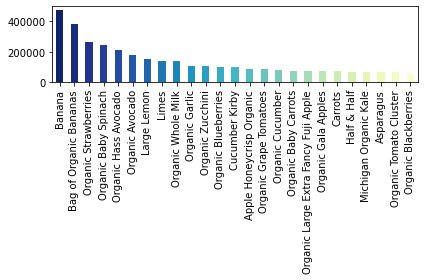

In [83]:
bar_top_25_selling_items = top_25_selling_items['product_name'].value_counts().plot.bar(color = sns.color_palette('YlGnBu_r', 25))
plt.tight_layout()

In [84]:
bar_top_25_selling_items.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_25_selling_items.png'))

In [86]:
sales_per_age_group = top_25_selling_items.groupby('age_group').agg({'order_number':['mean']})

In [87]:
sales_per_age_group

,order_number
,mean
age_group,
18-20,18.201507
21-30,18.234945
31-40,18.603790
41-50,18.276069
51-60,18.345565
61-70,18.263389
71-80,18.286088
80+,18.993192


In [88]:
sales_per_number_of_dependents = top_25_selling_items.groupby('parental_status').agg({'order_number':['mean']})

In [89]:
sales_per_number_of_dependents

,order_number
,mean
parental_status,
non parent,18.457275
parent,18.300526


In [90]:
sales_per_income = top_25_selling_items.groupby('income_range').agg({'order_number':['mean']})

In [91]:
sales_per_income

,order_number
,mean
income_range,
100000-150000,18.379550
150000-200000,18.278517
200000-250000,18.689846
25000-50000,16.425376
250000+,21.119825
50000-100000,18.473160
other,17.936086


In [92]:
sales_per_weekday = top_25_selling_items.groupby('weekday').agg({'order_number':['mean']})

In [93]:
sales_per_weekday

,order_number
,mean
weekday,
Friday,17.733653
Monday,18.507489
Saturday,17.112215
Sunday,18.156018
Thursday,19.378558
Tuesday,19.197519
Wednesday,19.491206


In [94]:
Sales_by_department_id = ords_prods_cust_merged_2.groupby('department_id').agg({'prices' : ['min', 'mean', 'max','sum']})

In [96]:
Sales_by_department_id

prices                                 
                 min       mean      max          sum
department_id                                        
1                1.0   7.736553     15.0   17289206.8
2                1.1   6.990934     15.0     253708.0
3                1.0   7.853809     15.0    9208026.0
4                1.0   7.981708     15.0   75660934.5
5                1.0   8.143701     15.0    1251654.3
6                1.0   7.682264     15.0    2068472.7
7                1.0   7.680502     15.0   20646135.1
8                1.0   7.889070     15.0     770888.4
9                1.0   7.350283     15.0    6369953.6
10               1.4   8.348960     14.1     288648.6
11               1.0   7.996769     15.0    3579129.9
12               8.0  16.294443     25.0   11551570.3
13               1.0   8.009443     20.0   15020660.8
14               1.0   8.028963     14.9    5644626.0
15               1.0   7.539976     15.0    8053132.0
16               1.0  33.479533  99999.0  180747527.3
17               1.0   7.384058     15.0    5454352.7
18               1.0   7.638380     15.0    3237160.6
19               1.6   4.275437      7.0   12345538.0
20               1.0   7.778701     15.0    8177351.8
21               1.0   8.660716     15.0     598845.2

In [97]:
ords_prods_cust_merged_2['prices'].value_counts().sort_index()

1.0        115143
1.1        242782
1.2        256258
1.3        425691
1.4        392209
            ...  
24.8          410
24.9         5781
25.0        13772
14900.0      4429
99999.0       698
Name: prices, Length: 242, dtype: int64

In [99]:
result = []

for value in ords_prods_cust_merged_2['prices']:
    if value >= 14900: 
        result.append('outlier')
    else: 
        result.append('other')

In [100]:
result

['other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',


In [101]:
ords_prods_cust_merged_2['price_range'] = result

In [102]:
ords_prods_cust_merged_2['price_range'].value_counts()

other      32399732
outlier        5127
Name: price_range, dtype: int64

In [103]:
ords_prods_cust_merged_3 = ords_prods_cust_merged_2[ords_prods_cust_merged_2['price_range']=='other']

In [104]:
ords_prods_cust_merged_3['price_range'].value_counts()

other    32399732
Name: price_range, dtype: int64

In [105]:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [106]:
df_dep.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [107]:
df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [108]:
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 1, 'department_name'] = 'frozen'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 2, 'department_name'] = 'other'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 3, 'department_name'] = 'bakery'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 4, 'department_name'] = 'produce'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 5, 'department_name'] = 'alcohol'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 6, 'department_name'] = 'international'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 7, 'department_name'] = 'beverages'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 8, 'department_name'] = 'pets'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 9, 'department_name'] = 'dry goods pasta'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 10, 'department_name'] = 'bulk'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 11, 'department_name'] = 'personal care'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 12, 'department_name'] = 'meat seafood'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 13, 'department_name'] = 'pantry'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 14, 'department_name'] = 'breakfast'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 15, 'department_name'] = 'canned goods'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 16, 'department_name'] = 'dairy eggs'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 17, 'department_name'] = 'households'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 18, 'department_name'] = 'babies'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 19, 'department_name'] = 'snacks'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 20, 'department_name'] = 'deli'
ords_prods_cust_merged_3.loc[ords_prods_cust_merged_3['department_id'] == 21, 'department_name'] = 'missing'

C:\Users\Johnn\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Johnn\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [109]:
ords_prods_cust_merged_3['department_name'].value_counts()

produce            9479291
dairy eggs         5393620
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
households          738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department_name, dtype: int64

In [110]:
ords_prods_cust_merged_3.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
order_dow                    int64
order_hour_of_day            int64
days_since_prior_order     float64
first_order                   bool
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
price_range_loc             object
busiest_day                 object
Busiest_Days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spending                   float64
spending_flag               object
frequency                  float64
frequency_flag              object
gender                      object
state                       object
age                          int64
date_joined                 object
number_of_dependants

In [111]:
ords_prods_cust_merged_3.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merged_3.pkl'))